In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.models import Model
from keras.losses import categorical_crossentropy, mse
from keras.optimizers import Adadelta, Adam, SGD

Using TensorFlow backend.


In [3]:
def plot_history(history):
    f1 = plt.figure()
    plt.plot(history.history['loss'],label='training')
    plt.plot(history.history['val_loss'],label='validation')
    #plt.ylim(0,1)
    plt.legend(loc='upper right')
    plt.show()
    
    f2 = plt.figure()
    plt.plot(history.history['acc'],label='training')
    plt.plot(history.history['val_acc'],label='validation')
    plt.ylim(0,1)
    plt.legend(loc='upper right')
    plt.show()
    return

In [15]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [4]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz')["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_dist.npz')["dist"]

In [5]:
X_val = np.load(os.path.join(data_folder,'Xy_val_dist.npz')["y"]
y_val = np.load(os.path.join(data_folder, 'Xy__val_dist.npz')["dist"]

In [ ]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz")["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_dist.npz")["dist"]

In [20]:
X_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['y']
y_pred = np.load(os.path.join(data_dir, 'trained_models/UNet_training_generator_1500epochs/Xy_test_predicted_UNet.npz'))['dist']

In [57]:
def cut_X(arr):
    x_cut = arr[:,960:1300,600:]
    if len(x_cut.shape)>3:
        x_cut = x_cut[...,0]
    x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    return x_cut_out

In [7]:
def ohe(values):
    values_reshaped = values.reshape(-1, 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    onehot_encoded = onehot_encoder.fit_transform(values_reshaped)
    return onehot_encoded

In [8]:
X_train_cut = cut_X(X_train)

In [9]:
X_val_cut = cut_X(X_val)

In [22]:
X_test_cut = cut_X(X_test)

In [58]:
X_pred_cut = cut_X(X_pred)

In [23]:
y_train_ohe = ohe(y_train)
y_val_ohe = ohe(y_val)
y_test_ohe = ohe(y_test)

In [12]:
def create_model(input_shape):
    input_layer = Input(shape=input_shape,name='input')
    x = Dense(256, activation='sigmoid')(input_layer)
    x = Dense(128, activation ='sigmoid')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation ='sigmoid')(x)
    prediction = Dense(4, activation='softmax')(x)
    model = Model(inputs = input_layer, outputs = prediction)
    return model

model = create_model(input_shape=(X_train_cut.shape[1],))
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 272000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               69632256  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 69,673,668
Trainable params: 69,673,668
Non-trainable params: 0
________________________________________________________________

In [13]:
history = model.fit(X_train_cut, y_train_ohe, validation_data=(X_val_cut, y_val_ohe),
                    epochs=100, verbose=True, batch_size=8, shuffle=True)

Train on 768 samples, validate on 192 samples
Epoch 1/100
768/768 [==============================] - 10s 13ms/step - loss: 1.3833 - acc: 0.3151 - val_loss: 1.3676 - val_acc: 0.2083
Epoch 2/100
768/768 [==============================] - 5s 6ms/step - loss: 1.3103 - acc: 0.3971 - val_loss: 1.2316 - val_acc: 0.2812
Epoch 3/100
768/768 [==============================] - 5s 6ms/step - loss: 1.1485 - acc: 0.5469 - val_loss: 1.0666 - val_acc: 0.7188
Epoch 4/100
768/768 [==============================] - 5s 6ms/step - loss: 0.8953 - acc: 0.6914 - val_loss: 0.7844 - val_acc: 0.4688
Epoch 5/100
768/768 [==============================] - 5s 6ms/step - loss: 0.6843 - acc: 0.8125 - val_loss: 0.5055 - val_acc: 1.0000
Epoch 6/100
768/768 [==============================] - 5s 6ms/step - loss: 0.5123 - acc: 0.8919 - val_loss: 0.3634 - val_acc: 1.0000
Epoch 7/100
768/768 [==============================] - 5s 6ms/step - loss: 0.4008 - acc: 0.9271 - val_loss: 0.2548 - val_acc: 1.0000
Epoch 8/100
768/768 [

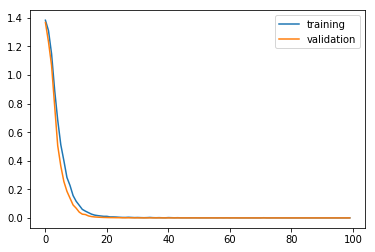

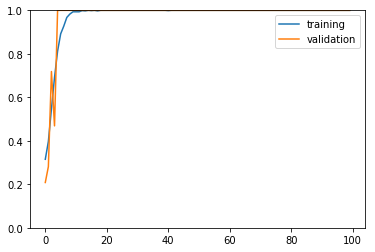

In [38]:
plot_history(history)

In [48]:
preds = model.predict(X_test_cut)

In [49]:
preds_classes = np.argmax(preds, axis=-1)

In [50]:
preds_classes

array([3, 2, 0, 1, 0, 3, 1, 3, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 3, 0, 3, 1,
       3, 1, 1, 0, 0, 0, 2, 3, 1, 0, 3, 1, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 3, 0, 0, 1, 0, 0, 3, 2, 3, 0, 2, 0, 1, 3, 3, 0,
       3, 2, 1, 1, 0, 1, 3, 2, 1, 3, 0, 0, 1, 0, 2, 0, 2, 2, 3, 3, 3, 3,
       1, 2, 0, 3, 2, 3, 0, 0, 2, 0, 1, 3, 3, 3, 1, 3, 1, 0, 2, 2, 0, 3,
       1, 0, 3, 2, 2, 1, 1, 3, 3, 2, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 2, 0,
       3, 1, 1, 0, 3, 1, 3, 3, 3, 0, 0, 2, 0, 2, 2, 0, 2, 3, 1, 0, 0, 1,
       0, 3, 0, 2, 2, 2, 0, 3, 0, 3, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 3,
       3, 0, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 3, 2, 1, 2, 3, 0, 2, 0, 2, 1,
       3, 3, 3, 3, 0, 1, 2, 0, 0, 2, 1, 0, 3, 2, 3, 1, 2, 1, 3, 2])

In [51]:
y_test

array([25, 10,  2,  4,  2, 25,  4, 25,  4, 10, 10,  2,  2, 10,  2,  2,  4,
       10, 10,  4,  4, 10, 10,  4,  2,  2, 10,  4,  4,  4,  4, 10, 10, 10,
        4,  4,  4,  2,  4, 10, 25,  2, 25,  4, 25,  4,  4,  2,  2,  2, 10,
       25,  4,  2, 25,  4, 25, 25, 25,  4,  4,  2,  2,  2,  2, 25,  2,  4,
        4,  4,  4,  2, 25,  2,  2,  4,  2,  2, 25, 10, 25,  2, 10,  2,  4,
       25, 25,  2, 25, 10,  4,  4,  2,  4, 25, 10,  4, 25,  2,  2,  4,  2,
       10,  2, 10, 10, 25, 25, 25, 25,  4, 10,  2, 25, 10, 25,  2,  2, 10,
        2,  4, 25, 25, 25,  4, 25,  4,  2, 10, 10,  2, 25,  4,  2, 25, 10,
       10,  4,  4, 25, 25, 10,  4, 10, 10,  4, 10, 10,  4,  4, 25,  4, 10,
        2, 25,  4,  4,  2, 25,  4, 25, 25, 25,  2,  2, 10,  2, 10, 10,  2,
       10, 25,  4,  2,  2,  4,  2, 25,  2, 10, 10, 10,  2, 25,  2, 25,  4,
       10,  4,  4, 10, 10,  2, 10,  4,  2,  2, 25, 25,  2, 10, 25, 10, 25,
       10,  2, 10, 10, 10, 25, 25, 10,  4, 10, 25,  2, 10,  2, 10,  4, 25,
       25, 25, 25,  2,  4

In [63]:
def preds_to_classes(pred_array):
    pred_array[pred_array==2]=10
    pred_array[pred_array==0]=2
    pred_array[pred_array==1]=4
    pred_array[pred_array==3]=25
    return pred_array

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds_classes)

array([[62,  0,  0,  0],
       [ 0, 60,  0,  0],
       [ 0,  0, 60,  0],
       [ 0,  0,  0, 58]])

In [61]:
preds_unet = model.predict(X_pred_cut)

In [62]:
preds_classes_unet_masks = np.argmax(preds_unet, axis=-1)

In [64]:
unet_classes_predicted = preds_to_classes(preds_classes_unet_masks)

In [65]:
confusion_matrix(y_test, unet_classes_predicted)

array([[62,  0,  0,  0],
       [ 0, 60,  0,  0],
       [ 0,  0, 60,  0],
       [ 0,  0,  0, 58]])